<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW7/ClusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import seaborn as sns
%pylab inline

# Define default font size to be 18 for readability
pl.rcParams['font.size'] = 18

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [2]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv")

# 1. explore the data. 

In [3]:
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
genes = genes.dropna(axis=0)

In [5]:
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
genes.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,1301.500000,-0.074219,-0.004992,0.005083,-0.079159,-0.042852,0.015122,-0.059658,-0.039993,-0.088130,0.000743,-0.041528,-0.015251,-0.034757,-0.112920,-0.048207,-0.012697,-0.002441,-0.023402,-0.009031,-0.043262,-0.010685,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,751.277024,0.494020,0.346403,0.331839,0.692958,0.428961,0.339459,0.379709,0.351300,0.455827,0.345465,0.362323,0.447244,0.540109,0.580689,0.496463,0.543407,0.465599,0.388044,0.397990,0.425980,0.403044,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,651.250000,-0.378972,-0.212770,-0.179147,-0.506662,-0.276024,-0.144611,-0.309549,-0.234297,-0.332846,-0.210783,-0.261752,-0.280335,-0.321751,-0.392277,-0.350688,-0.324134,-0.252941,-0.238955,-0.231085,-0.293276,-0.216709,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [7]:
scaledgenes = pd.DataFrame(skl.preprocessing.scale(genes))
scaledgenes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-1.731385,-0.146019,-1.488856,0.514638,-0.353014,0.502572,0.029563,0.222502,0.604333,0.647998,0.075182,1.136687,0.907956,-0.127309,0.367495,-0.660243,0.534738,-0.276161,0.034742,-0.980446,-0.197406,0.609548,1.494984,0.115342,-0.097776,0.834808,1.425107,1.571905,-0.054503,0.299091,0.348216,1.390682,0.284985,0.501318,0.856694,-0.853848,0.161556,0.950363,-0.353100,-0.008300,-0.099195,1.091593,0.541688,-0.251869,0.967078,0.549274,0.234840,2.707725,-0.148490,0.059847,0.877376,0.023328,0.275269,0.358016,-0.277437,-0.337881,-0.092524,0.956724,0.783125,0.484408,-0.576192,0.126103,0.037952,0.444157,-0.211445,0.576660,-0.776721,-0.001318,-0.672957,0.202170,0.440209,0.045815,1.098020,0.436797,1.006906
1,-1.730054,-0.792728,0.464332,0.666898,-0.676048,0.195739,0.359141,0.427133,0.016276,1.292408,0.013869,1.202594,1.095210,0.055175,1.621696,-0.827387,0.027786,-0.505117,-0.289729,-1.158889,0.309853,-0.070339,1.428788,0.544404,-0.201160,1.240637,1.555996,2.044202,-0.508714,0.695053,-0.286004,0.170844,0.370791,0.487009,0.737470,-0.161089,0.446022,1.310643,-0.344948,0.516954,0.200795,1.657301,-0.017265,0.381959,1.143808,1.090641,0.120314,1.881579,-0.815878,0.153995,0.433791,-0.615950,0.081879,-0.234432,-1.120606,-0.312187,-0.542851,0.002609,1.110759,0.298254,-0.722362,0.043553,0.318469,-0.242917,-0.819484,0.846758,-1.021731,-0.420254,-0.644995,0.350828,0.073335,0.608766,0.923101,-0.749670,0.630622
2,-1.728723,-0.029854,-0.586855,-0.470565,-0.301764,-0.892364,0.311979,-0.100687,0.092237,0.916678,-0.646321,0.398565,0.209992,-0.259801,0.305572,-0.394290,-0.043692,-1.747101,-0.182220,-1.954691,-1.065694,-0.498056,0.655872,0.497126,-0.348993,-0.032556,0.983376,0.692545,0.268341,1.218127,-0.958493,-0.263409,-1.167418,0.474370,-0.031375,-1.650354,-1.340592,0.010389,-0.007276,-0.945628,-0.449924,0.179561,0.437077,0.774829,-0.135723,0.812693,-0.318086,1.081257,-0.815935,0.472055,0.667890,0.012390,-0.314736,0.303127,-0.074875,-0.016122,0.099233,0.208290,1.111159,0.205389,-1.414642,0.343176,-0.418678,-0.480002,0.389655,0.048375,-1.049329,-0.155712,-0.412715,0.133189,0.080352,-0.194740,-0.420867,-0.565212,-0.063473
3,-1.727391,-0.513189,-4.937272,0.191776,-0.128601,-0.999641,0.777537,-0.002835,-0.519828,1.637398,0.373869,1.581952,-0.210795,-0.266839,0.206770,-0.590421,-1.084528,-0.510219,0.852890,-0.642572,-0.144977,1.484118,0.590947,-0.848305,0.273840,0.316052,1.173312,0.770137,1.133725,0.310780,0.191313,0.250755,-0.376692,-0.929355,1.041450,-0.056358,-0.780719,1.613721,0.709560,0.717453,-0.226552,-0.092706,0.268279,-0.108837,0.489395,0.889698,2.291933,1.064483,0.337610,1.054762,0.053428,0.800454,0.168110,1.550840,0.715554,0.490909,-0.566964,0.485855,0.172965,0.319175,-0.046334,0.313694,0.235179,0.696623,-0.700702,0.397035,-0.265448,-0.371819,-0.755718,2.324671,-0.197438,-2.388543,-0.452573,0.862189,0.200050
4,-1.726060,-0.036661,-1.892565,0.213591,-0.818882,-0.007659,-0.074920,1.127750,-0.010928,-0.511103,0.335597,1.069383,0.665961,-0.079383,1.617300,-0.177465,-1.240288,-1.242240,0.156628,-0.245946,0.562178,0.526957,0.502980,0.161776,0.052103,0.468239,0.787042,1.167348,-0.225869,0.657280,-0.569612,1.601774,0.044756,0.101760,-1.378444,-0.602369,-0.207398,1.942259,-0.873132,0.878144,0.091284,0.975895,0.076618,1.044569,-0.257918,1.727517,0.998650,1.071057,-0.609384,0.283784,-0.462979,-0.427668,2.338521,0.045657,-0.703241,-0.081914,0.678818,0.224309,1.132434,1.636439,-1.854763,-0.679603,0.278083,2.058854,-1.064301,0.011097,1.052555,0.550454,-0.487088,0.311425,-0.083219,-0.569324,-1.012305,-1.139229,0.197174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [8]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(0    -0.0
 1    -0.0
 2     0.0
 3    -0.0
 4     0.0
      ... 
 70   -0.0
 71   -0.0
 72    0.0
 73   -0.0
 74    0.0
 Length: 75, dtype: float64, 0     1.000192
 1     1.000192
 2     1.000192
 3     1.000192
 4     1.000192
         ...   
 70    1.000192
 71    1.000192
 72    1.000192
 73    1.000192
 74    1.000192
 Length: 75, dtype: float64)

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [9]:
## For sections 2.1-2.3, uncomment the commented code to explore how the
## perplexity parameter influences the final 2D projection of the data
## Could also just remove the comments if we don't want to do this

#tsne10 = skl.manifold.TSNE(n_components=2, perplexity=10, verbose=1,
#                           random_state=123)
#tsne50 = skl.manifold.TSNE(n_components=2, perplexity=50, verbose=1,
#                           random_state=123)
tsne = skl.manifold.TSNE(n_components=2, perplexity=30, verbose=1, 
                         random_state=123)


In [10]:
tsne_results = tsne.fit_transform(scaledgenes)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2602 samples in 0.024s...
[t-SNE] Computed neighbors for 2602 samples in 1.247s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2602
[t-SNE] Computed conditional probabilities for sample 2000 / 2602
[t-SNE] Computed conditional probabilities for sample 2602 / 2602
[t-SNE] Mean sigma: 2.001062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.030876
[t-SNE] KL divergence after 1000 iterations: 2.020160


In [11]:
#tsne10_results = tsne10.fit_transform(scaledgenes)
#tsne50_results = tsne50.fit_transform(scaledgenes)


*2.3* plot the TSNE projection


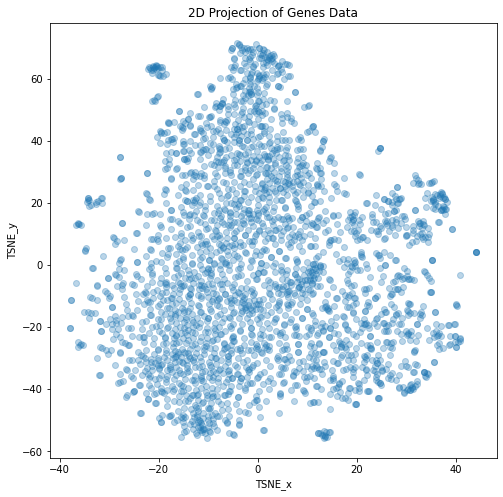

In [12]:
x=tsne_results[:,0]
y=tsne_results[:,1]

pl.figure(figsize=(8, 8))
pl.scatter(x, y, alpha=0.3)

# Add labels even though they mean nothing physically
pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection of Genes Data")
pl.xticks()

pl.show()
### ADD CAPTION, talk about structure in projection



In [13]:
#x10=tsne10_results[:,0]
#y10=tsne10_results[:,1]

#pl.scatter(x10, y10, alpha=0.1)
#pl.show()


In [14]:
#x50=tsne50_results[:,0]
#y50=tsne50_results[:,1]

#pl.scatter(x50, y50, alpha=0.1)
#pl.show()


2.4 calculate a function that measures the intracluster variance (i did it in class)

In [15]:
def calICVar(points, labels, centers):
  variances = []
  clusters = np.amax(labels) + 1
  for i in range(clusters):
    sum = 0
    for j in range(len(points)):
      for k in range(75):
        if(i == labels[j]):
          sum += (abs(points.iloc[j][k]-centers[i][k]))**2
    variances.append(sum)
  print(variances)
  return np.sum(variances)


# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

In [16]:
nClust = 10
Nvals = []
ICVvals = []

for i in range(nClust):
  Nvals.append(i+1)
  geneclustersKM = cluster.KMeans(n_clusters=(i+1)).fit(scaledgenes)
  ICV = calICVar(scaledgenes, geneclustersKM.labels_, 
                 geneclustersKM.cluster_centers_)
  ICVvals.append(ICV)


[195150.00000000207]
[104001.14423555136, 52764.10334891813]
[21071.330877891272, 70459.88465216242, 51869.16150522672]
[24427.009951411143, 42695.960574925884, 48976.201778052695, 20321.951766444745]
[10185.844158740318, 14847.142365326128, 42859.4958857558, 37824.92672776933, 24406.229483481875]
[36919.801117451345, 28513.08694428881, 10348.637766702503, 21913.657829862554, 17772.31846077263, 10237.804967154694]
[26935.4206722601, 8324.56992955103, 19162.260144386782, 24198.017952950195, 9916.975956033248, 15571.346248198926, 18261.82618302173]
[21999.46789657394, 19360.26389002442, 8272.950460877688, 7514.627322650812, 16765.689993448093, 18427.457592807008, 2737.9755942620004, 25194.757731933667]
[8791.358557171528, 8099.987910143548, 13884.70194077919, 22059.17393109549, 15432.761223012805, 3737.4160440434584, 11737.93470220564, 22070.939216331775, 12469.915886336747]
[21260.010188973676, 8324.56992955103, 6053.8479661207475, 6884.085206906703, 15336.906352961016, 20936.9047492324

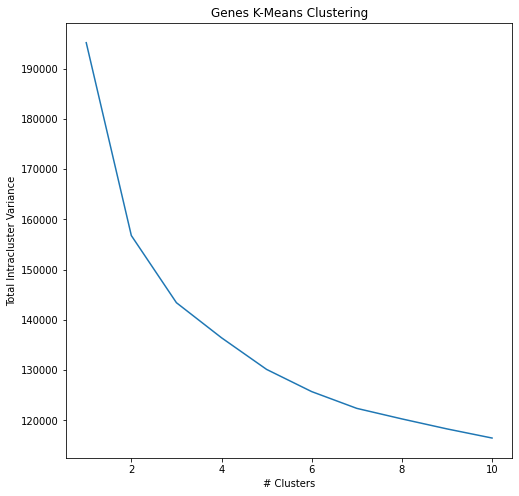

In [17]:
pl.figure(figsize=(8, 8))
pl.plot(Nvals, ICVvals)
pl.xlabel("# Clusters")
pl.ylabel("Total Intracluster Variance")
pl.title("Genes K-Means Clustering")

pl.show()

## ADD CAPTION, talk about elbow and what is best number of clusters (maybe 3?)

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

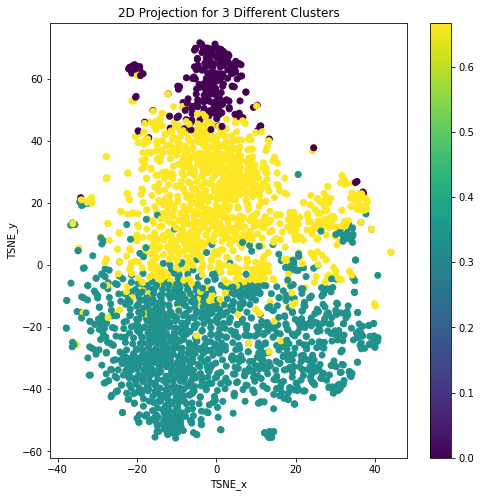

In [18]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.figure(figsize=(8, 8))
pl.scatter(tsne_results[:,0], tsne_results[:,1], c=geneclustersKM.labels_ / 
           geneclustersKM.n_clusters)
pl.colorbar()

pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection for 3 Different Clusters")

pl.show()

## ADD CAPTION, in caption state that the different colors correspond to
## different clusters

ideally you should be able to isolate the little islands, like the one on the left "at 7 hour". Try to set the starting guess in a way that may facilitate this

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

In [19]:
# calculate Euclidean distance between two points
def distance(p1, p2):
  '''Calculates the Euclidean distance between two points, p1 and p2
  
  Args:
    p1: point 1
    p2: point 2

  Returns:
    The euclidean distance between p1 and p2
  '''
    return np.sqrt(np.sum(np.square(p1 - p2)))

In [20]:
# create distance matrix
distMatrix = np.zeros((len(scaledgenes),len(scaledgenes)))
for i in range(len(scaledgenes)):
    # stop when j=i. Diagonal is intialized to 0 already, 
    # and we know matrix will be symmetric
    for j in range(i):
        distMatrix[i][j] = distance(scaledgenes.iloc[i],scaledgenes.iloc[j])
        #we know matrix will be symmetric - cut down on computation time
        distMatrix[j][i] = distMatrix[i][j] 

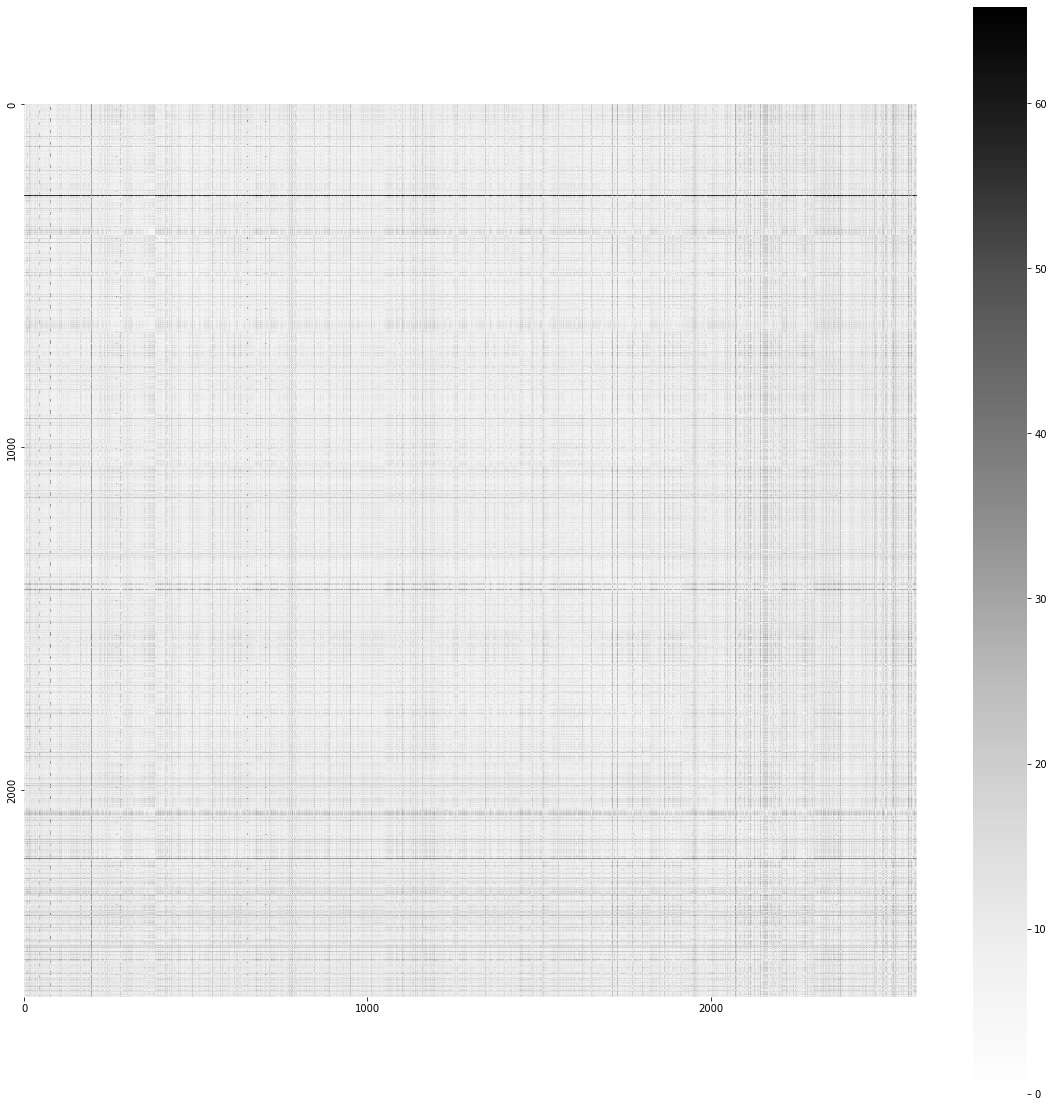

In [45]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(distMatrix,cmap='Greys',xticklabels=1000,yticklabels=1000,
                  square=True)

Pairwise distance matrix for all 2602 data points. No clear structure. Visible artifacting from upscaling small square boxes.

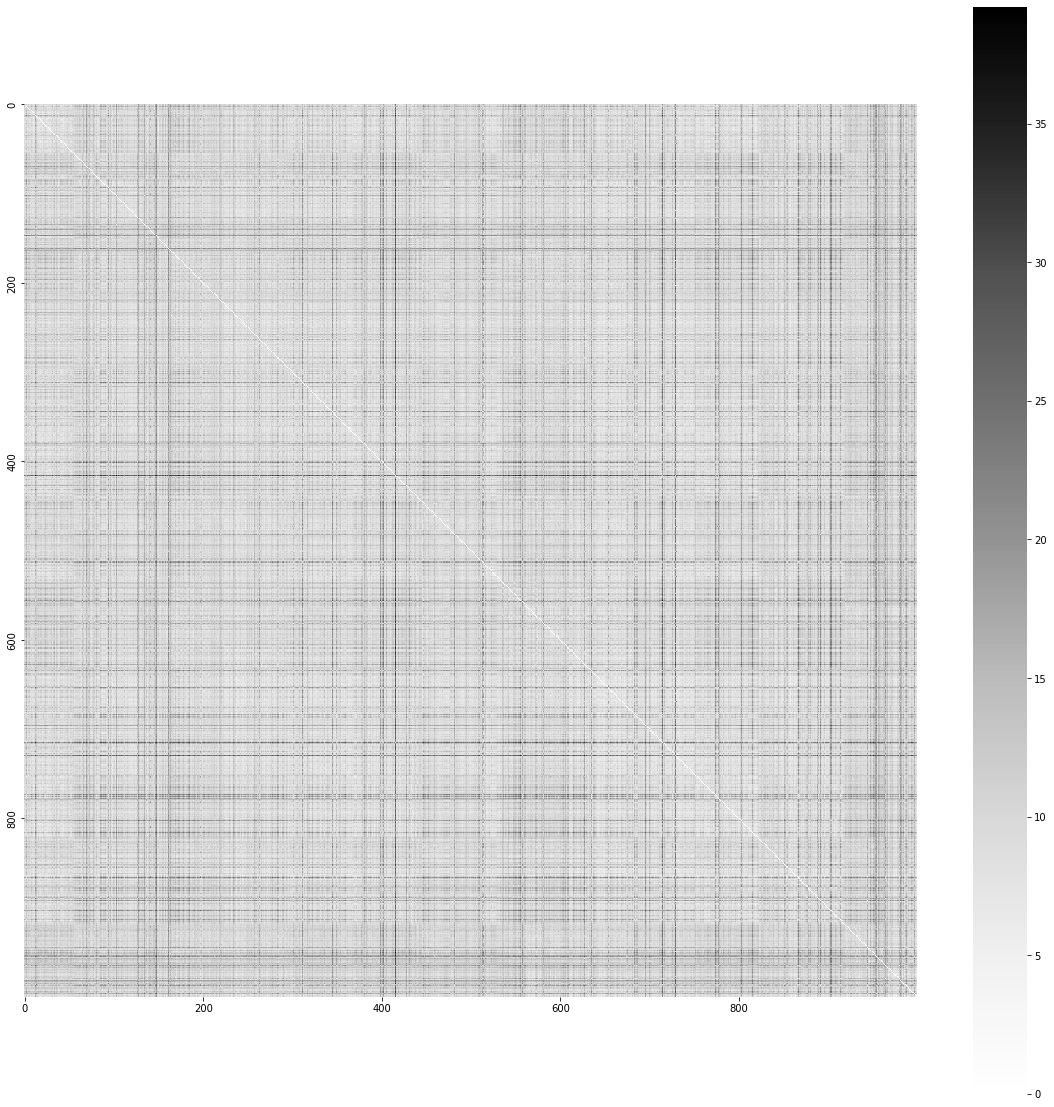

In [46]:
#plot a subset because looking at an array this big is stupid
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(distMatrix[1000:2000,1000:2000],cmap='Greys',xticklabels=200,
                 yticklabels=200,square=True)

Pairwise distance matrix for datapoints 1000-2000. Some structure visible - a diagonal line all with the same value: 0. Artifacting still apparant.

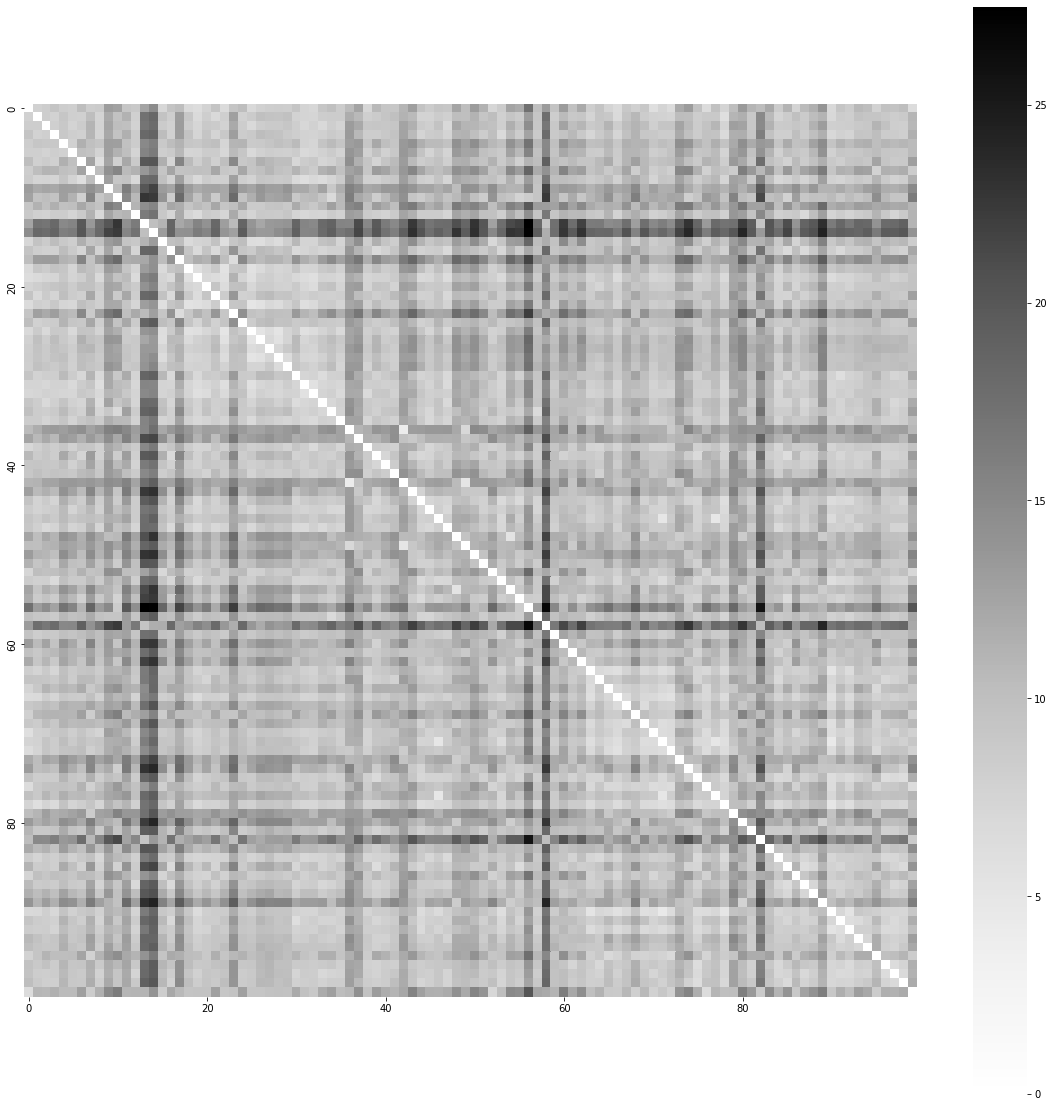

In [48]:
#and again
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(distMatrix[1500:1600,1500:1600],cmap='Greys',xticklabels=20,
                 yticklabels=20,square=True)

Pairwise distance matrix for points 1500-1600. Structure is more clearly visible. The matrix is symmetric about the diagonal. The diagonal values are all the same - 0.

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

mean: 11.6


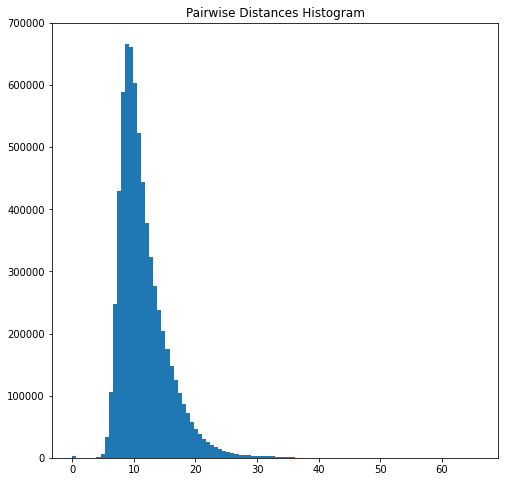

In [24]:
distances = distMatrix.flatten()
plt.figure(figsize=(8, 8))
plt.hist(distances, bins=100)
plt.title("Pairwise Distances Histogram")

print("mean: {0:.1f}".format(np.mean(distances)))

Histogram of the frequency of values in the entirety of the pairwise distances matrix with 100 bins. The mean value is 11.6. There is a grouping of datapoints at the bin with low edge equal to 0, corresponding to the distances of each point with itself.

### Mean is about 11.6, choose to initialize DBSCAN at 10
### Min samples is atleast number of dimensions +1, so choose 75+1=76

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

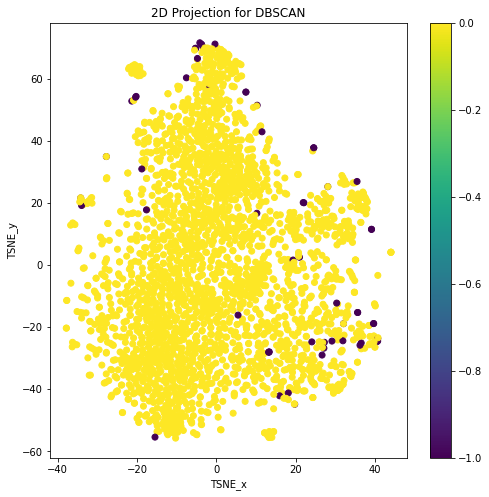

In [49]:
#plots dont need to look exactly like mine
geneclustersDBSCAN = cluster.DBSCAN(eps=10,min_samples=76,
                                    metric='euclidean').fit(scaledgenes)

pl.figure(figsize=(8, 8))
pl.scatter(tsne_results[:,0], tsne_results[:,1], c=geneclustersDBSCAN.labels_)
pl.colorbar()

pl.xlabel("TSNE_x")
pl.ylabel("TSNE_y")
pl.title("2D Projection for DBSCAN")

pl.show()

## ADD CAPTION, in caption state that the different colors correspond to
## different clusters

TSNE projection after performing the DBSCAN. A majority of points were clustered together with 59 outliers.

4a.4 How many clusters do you have, how many outliers? is that a significant number?

### DBSCAN puts every point into 1 cluster, and separates outliers. Here there are 59 outliers. Out of 2602 datapoints, this is not significant

In [50]:
n_outliers = sum(geneclustersDBSCAN.labels_[i] == -1 
                 for i in range(len(geneclustersDBSCAN.labels_)));
print("number of outliers: {0:2}".format(n_outliers))

number of outliers: 59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
